## Machine Learning - kMeans clustering

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


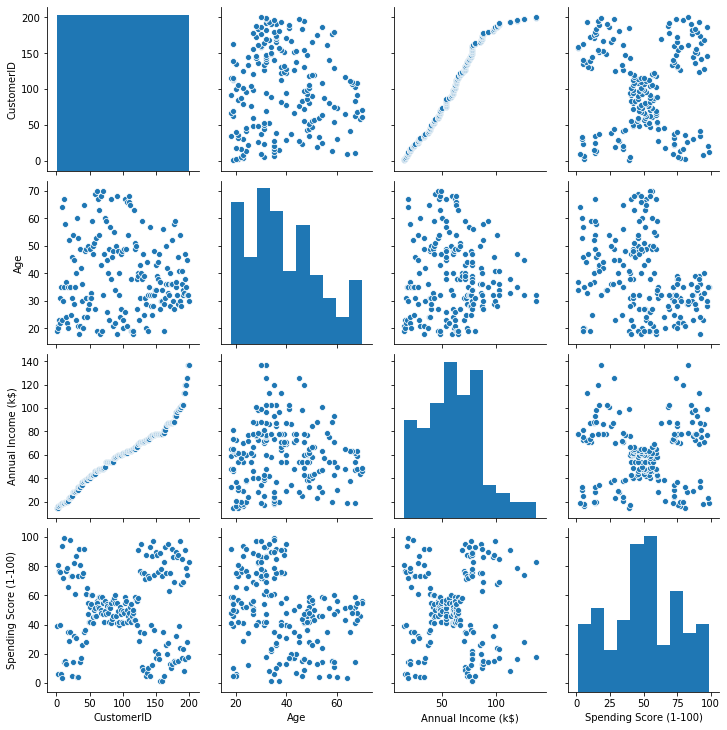

In [5]:
sns.pairplot(customers)

In [6]:
from sklearn.cluster import KMeans

In [7]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Find clusters based on Age and Spending score

In [8]:
X = customers[['Age', 'Spending Score (1-100)']].values

In [9]:
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

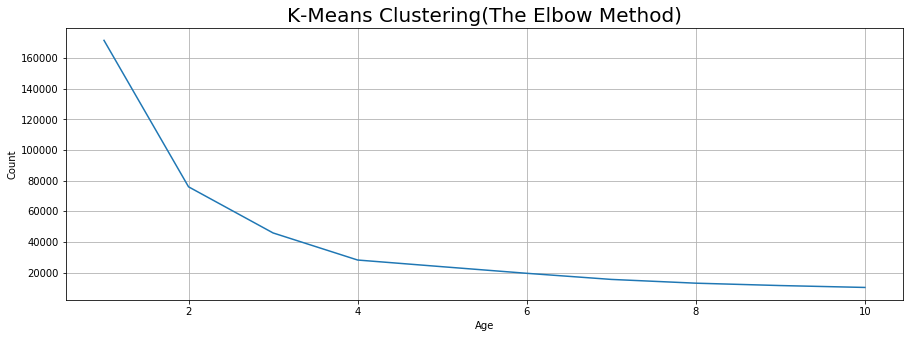

In [10]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
model = kmeans.fit_predict(X)

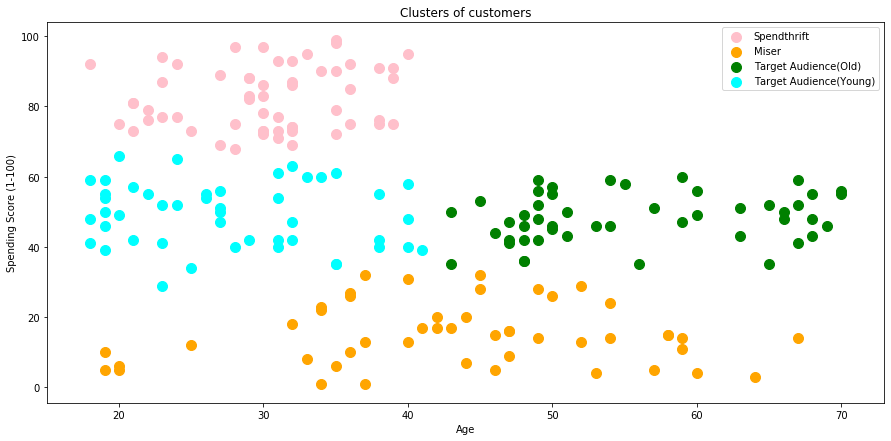

In [23]:
plt.figure(figsize = (15,7))

plt.scatter(X[model == 0, 0], X[model == 0, 1], s = 100, c = 'pink', label = 'Spendthrift')
plt.scatter(X[model == 1, 0], X[model == 1, 1], s = 100, c = 'orange', label = 'Miser')
plt.scatter(X[model == 2, 0], X[model == 2, 1], s = 100, c = 'green', label = 'Target Audience(Old)')
plt.scatter(X[model == 3, 0], X[model == 3, 1], s = 100, c = 'cyan', label = 'Target Audience(Young)')

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

plt.legend()


In [20]:
X[model == 0,1]

array([81, 77, 76, 94, 72, 99, 77, 79, 98, 73, 73, 82, 87, 73, 92, 81, 73,
       75, 92, 91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88,
       76, 89, 78, 73, 83, 93, 75, 95, 75, 92, 86, 69, 90, 86, 88, 97, 68,
       85, 69, 91, 79, 74, 83], dtype=int64)

In [24]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Based on Annual Income and Spending score

In [25]:
X =  customers[['Annual Income (k$)', 'Spending Score (1-100)']].values

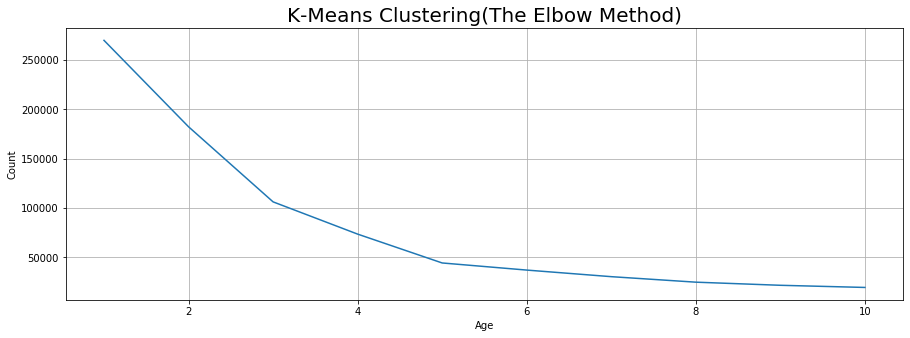

In [26]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (15, 5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

In [27]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')

model = kmeans.fit_predict(X)

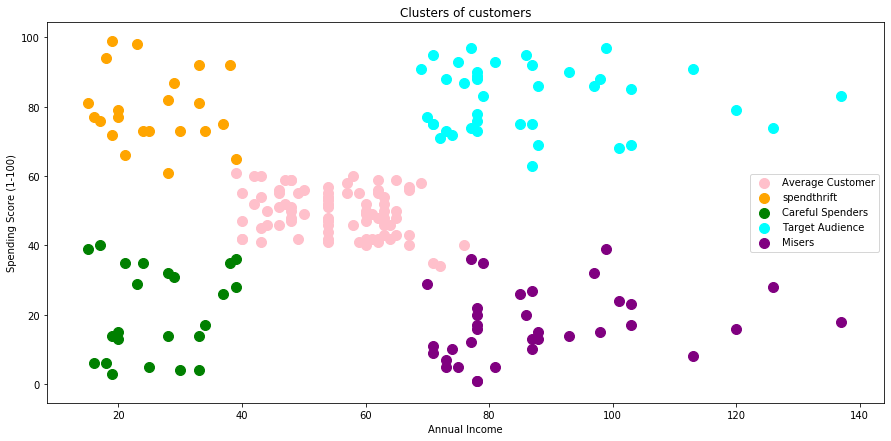

In [31]:
plt.figure(figsize = (15,7))

plt.scatter(X[model == 0, 0], X[model == 0, 1], s = 100, c = 'pink', label = 'Average Customer')
plt.scatter(X[model == 1, 0], X[model == 1, 1], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(X[model == 2, 0], X[model == 2, 1], s = 100, c = 'green', label = 'Careful Spenders')
plt.scatter(X[model == 3, 0], X[model == 3, 1], s = 100, c = 'cyan', label = 'Target Audience')
plt.scatter(X[model == 4, 0], X[model == 4, 1], s = 100, c = 'purple', label = 'Misers')


plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

plt.legend()